# SECOND ASSIGNMENT. MACHINE LEARNING WITH SCIKIT-LEARN. 
## PART I (1 POINT)

The aim of part I of the Scikit-learn assignment is for you to self-learn and get used to this Machine Learning tool. The main part (part II) of the assignment will be explained next week (11/12). 

Here, you will learn to:

- Perform a crossvalidation on the iris classification problem with decision trees (so far, we have only done regression)
- Perform a crossvalidation on the iris classification problem **with KNN** (I haven't explained this, you will have to learn how to use it from the web)
- Perform grid search in order to determine the best value for hyper-parameter K

You will also have to go through two notebooks I have prepared for you in order to see how crossvalidation and hyper-parameter tuning are used in Scikit-learn




# 0. Carry out the "DECISION TREES WITH A TRAINING AND A TESTING SET AND CROSSVALIDATION" notebook and understand the main ideas

## 1. Perform a crossvalidation on the iris classification problem with decision trees:

** It is important to remember that for classification, you have to use**
- clf = tree.DecisionTreeClassifier() # for constructing the classifier
- metrics.accuracy # for computing error

Iris Dataset
shapes (150, 4) (150,)
feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


There are three substrains of iris
            0 = setosa
            1 = versicolor
            2 = virginica


Scatterplots


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


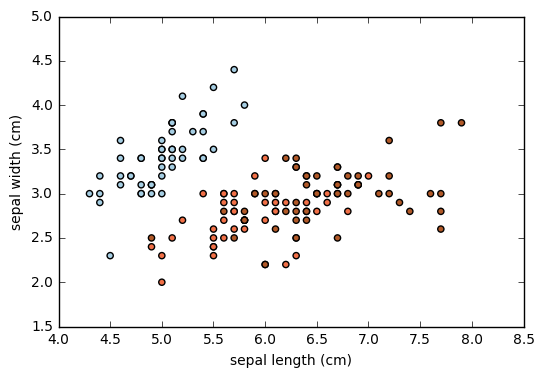

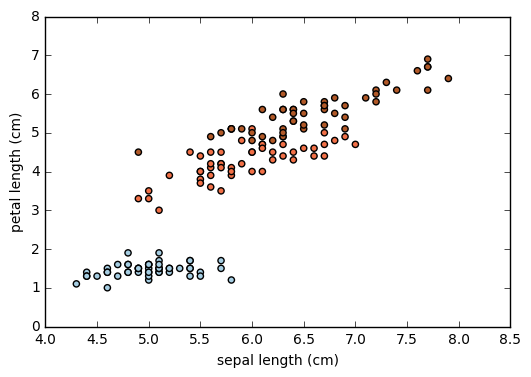

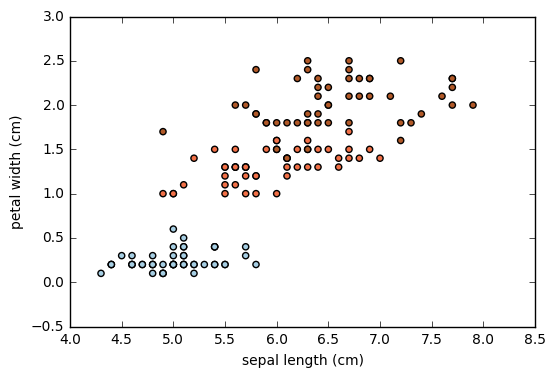

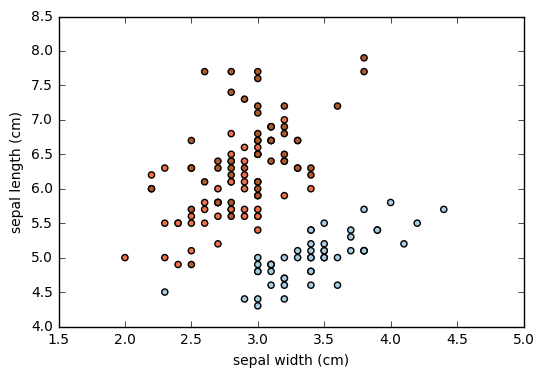

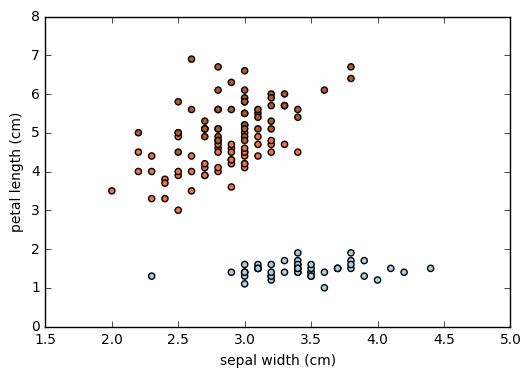

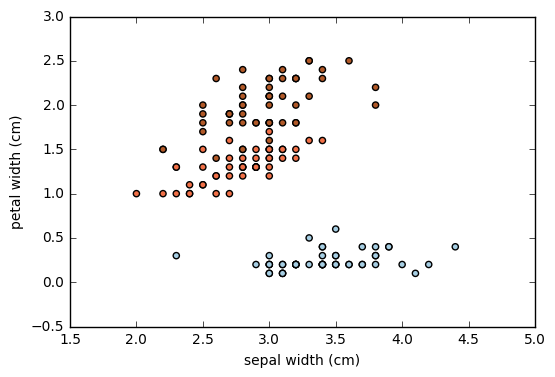

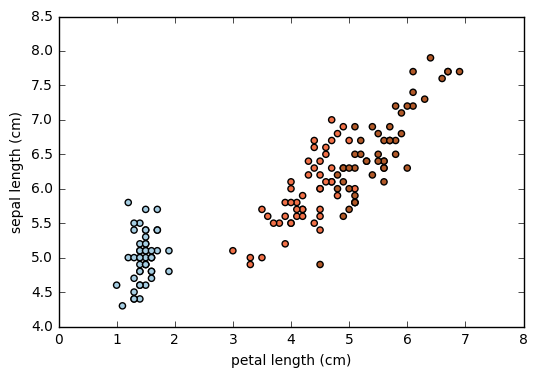

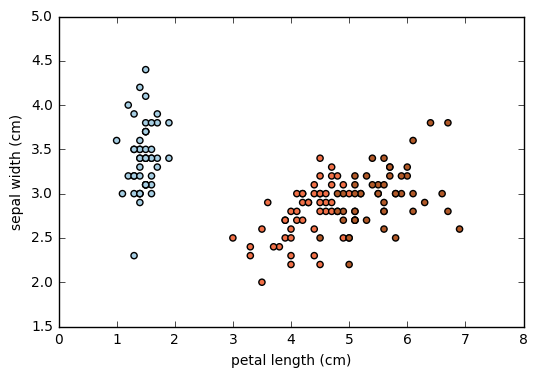

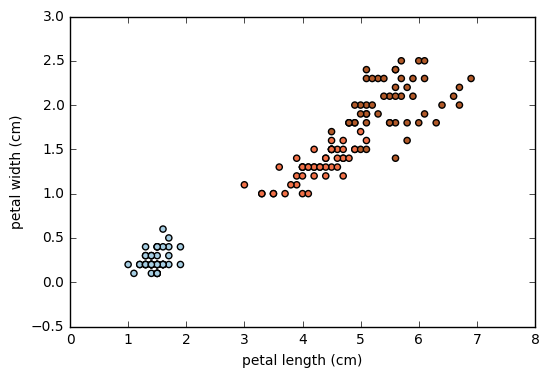

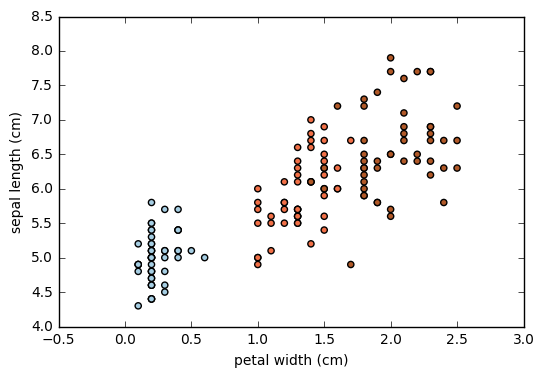

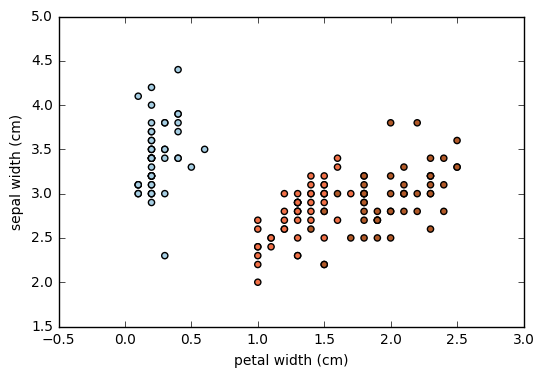

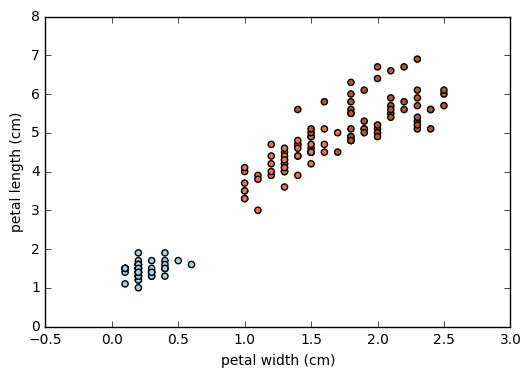

In [3]:
#REMEMBER 
#    Classification tree analysis is when the predicted outcome is the class to which the data belongs.
#    Regression tree analysis is when the predicted outcome can be considered a real number (e.g. the price of a house, or a patient’s length of stay in a hospital).

import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import svm
from sklearn import metrics
from sklearn import neighbors
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.cross_validation import cross_val_score, KFold #this modul is deprecated and will be removed in next version
#all functions are moved to model_selection module, however importing from that I get the error:
# TypeError: __init__() got multiple values for keyword argument 'shuffle' so...
# from sklearn.model_selection import cross_val_score, KFold

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

from scipy.stats import randint as sp_randint
from scipy.stats import sem #standard deviation

from sklearn.datasets import load_iris
iris = datasets.load_iris()
print("Iris Dataset")
print 'shapes %s %s' %(iris.data.shape, iris.target.shape)
print 'feature names %s' %(iris.feature_names)
#print(iris.data) not printed to save space, actually not necessary

print '\n'

print "There are three substrains of iris"
for j in xrange(0,len(iris.target_names)):
    indent = '            '
    print indent + '%d = %s' %(j ,iris.target_names[j])

print'\n'

print 'Scatterplots'
%matplotlib inline
import matplotlib.pyplot as plt

X = iris.data[:, :]
N = iris.feature_names
y = iris.target # The target variable y, is the dependent variable that we are trying to understand, classify or generalize.

for x in xrange(0,len(N)): #how can I achieve to plot only one among 1.3 and 3.1?
    for i in xrange (0,len(N)):
        if x == i:
            pass
        else:
            plt.scatter(X[:, x], X[:, i], c=y, cmap=plt.cm.Paired)
            plt.xlabel(N[x])
            plt.ylabel(N[i])
            plt.show()



Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if 
it was randomly labeled according to the distribution of labels in the subset.


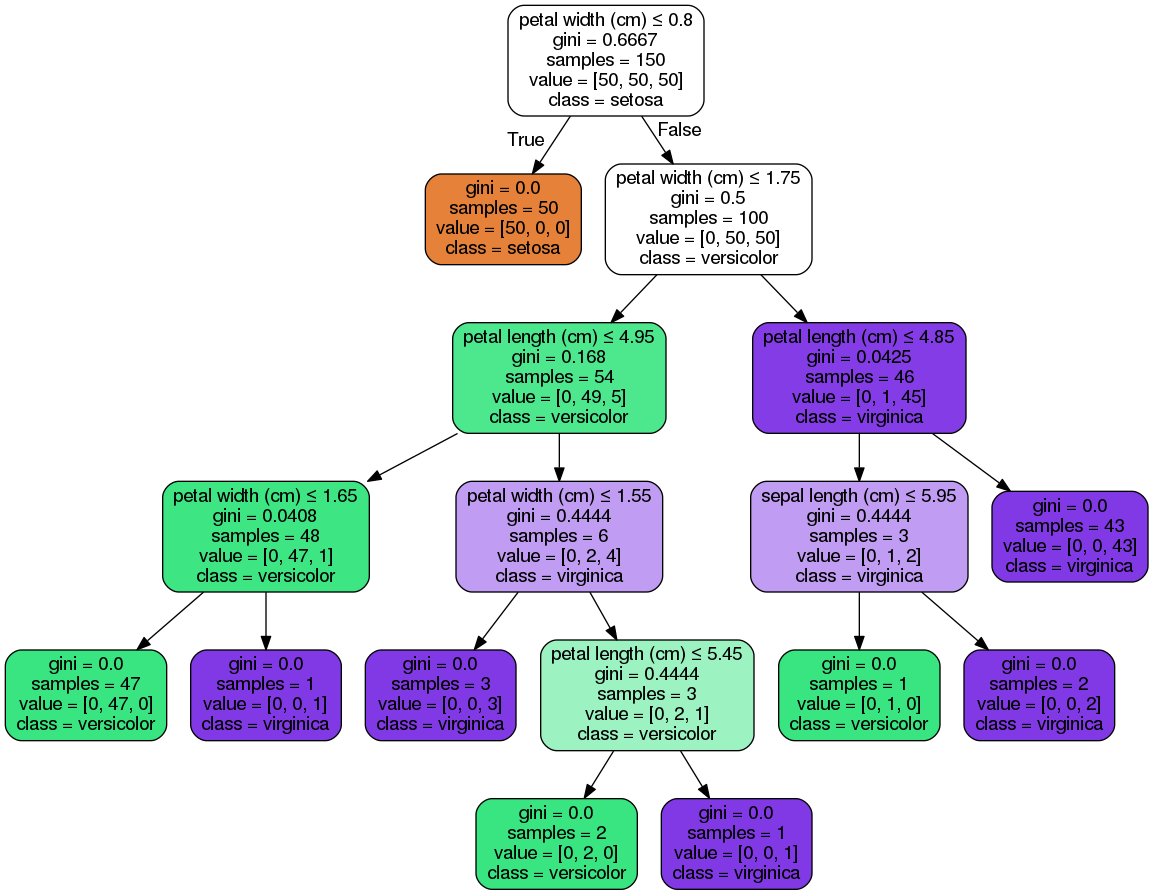

In [4]:
# Create an empty decision tree
clf = tree.DecisionTreeClassifier() #we're using classifier, not tree.DecisionTreeRegressor...
# Fill it
clf = clf.fit(iris.data, iris.target) #or, naturally, I could use X and y
clf

# Print the decision tree
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

print "Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if \nit was randomly labeled according to the distribution of labels in the subset."
import pydotplus     
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True,
                                rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


In [5]:
#CROSS-VALIDATION from http://scikit-learn.org/stable/modules/cross_validation.html
#and http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html

print'ERROR: here I am using SVM instead of cross-validation'
clf2 = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf2, iris.data, iris.target, cv=5)
print 'scores %s' %(scores)
print'With accuracy %0.3f +/- %0.3f \n' %(scores.mean(), 2*scores.std())

print'Cross-validation score'

np.random.seed(0)
cv = KFold(n = X.shape[0], n_folds = 10, shuffle=True, random_state=0) #iris.data is X

scores = cross_val_score(clf, 
                         X, y, 
                         scoring='accuracy',
                         n_jobs=-1,
                         cv=cv) # The "minus" is because scikit maximizes scores, hence errors are negative
# print the 10 scores
print(scores)
# use average accuracy as an estimate of out-of-sample accuracy
print ("Mean score: {0:.3f} (+/-{1:.3f})").format(scores.mean(), sem(scores))

print'\n'

ERROR: here I am using SVM instead of cross-validation
scores [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
With accuracy 0.980 +/- 0.033 

Cross-validation score
[ 1.          1.          0.93333333  0.8         1.          1.
  0.93333333  0.93333333  0.93333333  0.93333333]
Mean score: 0.947 (+/-0.019)




## 2. Perform a crossvalidation on the iris classification problem with KNN

I haven't explained how to use KNN in Scikit-learn. You will have to read and obtain the relevant information [here](http://scikit-learn.org/stable/modules/neighbors.html)

In [6]:
# Result of KNearestNeighbor with K=5
knn = KNeighborsClassifier(n_neighbors=5)

print'ERROR: here I am evaluating with train/test partitions'
print 'I need to split the data into a training dataset that kNN can use to make predictions and a test dataset \nthat we can use to evaluate the accuracy of the model. A ratio of 67/33 for train/test is a standard ratio used.'
#remember to try with DIFFERENT random_state values !
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print 'Classification accuracy is %.3f \n\n' %(metrics.accuracy_score(y_test, y_pred))


print'HERE with cross-validation \n'
np.random.seed(0)
cv = KFold(X.shape[0], 10, shuffle=True, random_state=0)
scores = cross_val_score(knn, X, y, scoring='accuracy', cv = cv, n_jobs=-1)
# print scores
# use average accuracy as an estimate of out-of-sample accuracy
print 'Classification accuracy is %.3f (+/-%.3f)' %(scores.mean(), sem(scores))
print'\n'

ERROR: here I am evaluating with train/test partitions
I need to split the data into a training dataset that kNN can use to make predictions and a test dataset 
that we can use to evaluate the accuracy of the model. A ratio of 67/33 for train/test is a standard ratio used.
Classification accuracy is 0.950 


HERE with cross-validation 

Classification accuracy is 0.960 (+/-0.020)




## 3. Try different values for K (KNN) - change them by hand- and see if you obtain a better result than with KNN default value. Always use crossvalidation.

3-fold (-> default) cross-validation with K=10 for KNN (the n_neighbors parameter)
0.973447712418


search for an optimal value of K for KNN
[0.9673202614379085, 0.95343137254901966, 0.98039215686274517, 0.97344771241830064, 0.98692810457516345, 0.97344771241830064, 0.97344771241830064, 0.97998366013071891, 0.97344771241830064, 0.97344771241830064, 0.97385620915032689, 0.96691176470588236, 0.96037581699346397, 0.96691176470588236, 0.9673202614379085, 0.96037581699346397, 0.96037581699346397, 0.94730392156862742, 0.95383986928104569, 0.94730392156862742, 0.95383986928104569, 0.95383986928104569, 0.95383986928104569, 0.96037581699346397, 0.94730392156862742, 0.96037581699346397, 0.94730392156862742, 0.95383986928104569, 0.95383986928104569]


3-fold cross-validation score with the best KNN model(k=5)
0.986928104575



Crossed search an optimal value of k for KNN and i for cross validation folds 

For cross-val with i=2 folds, the optimal K for KNN is 8
Which leads to an associated accura

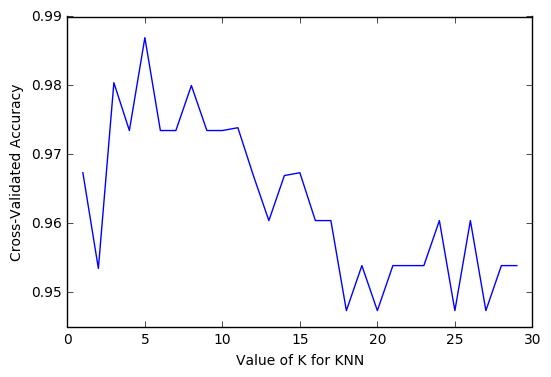

In [7]:
print'3-fold (-> default) cross-validation with K=10 for KNN (the n_neighbors parameter)'
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X, y, scoring='accuracy')
# print scores
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()
print'\n'

print'search for an optimal value of K for KNN'
k_range = range(1, 30) #I reduced to 30 because the graph is clearer than with 50. Why whit 100 I can't??????????
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, scoring='accuracy', n_jobs=-1)
    k_scores.append(scores.mean()) #to put the means into k_scores
print k_scores
print'\n'

##plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)##
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

print'3-fold cross-validation score with the best KNN model(k=5)'
knn = KNeighborsClassifier(n_neighbors=5)
print cross_val_score(knn, X, y, scoring='accuracy').mean()


print '\n\n\nCrossed search an optimal value of k for KNN and i for cross validation folds \n'
k_range = range(1, 10) 
i_range = range(2, 10) #k-fold cross validation requires at least one train / test split by setting n_folds=2 or more
final = np.zeros([len(i_range),1], dtype=[('ifold', 'i4'),('kval', 'i4'), ('score', 'f4')])
for i in i_range:
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=i, scoring='accuracy')
        k_scores.append(scores.mean()) #to put the means into k_scores
    index, value = max(enumerate(k_scores), key=operator.itemgetter(1))
    print 'For cross-val with i=%d folds, the optimal K for KNN is %d' %(i, index+1) #+1 because index begin with 0
    print 'Which leads to an associated accuracy score of %2f' %(value)
    final[i-2]=(i, index+1, value)

top=final['score'].max()
print'\nMax achievable accuracy is %2f'  %(top)
print(final[final['score']==top])
result=final[final['score']==top]
print'The max accuracy %2f is obtained when cross-val is performed on %d folds and the associated optimal value k for KNN is %d' %(result['score'], result['ifold'], result['kval'])

## 4. Carry out THE "DECISION TREE HYPER-PARAMETERS. TUNING DECISION TREES" notebook and understand the main ideas

## 5. Use Grid Search and Randomized Search to find the optimal value For K

In [8]:
print'GRID SEARCH \n'

param_grid = {'n_neighbors': range(2,20)}

np.random.seed(0)
knn = GridSearchCV(KNeighborsClassifier(), 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=-1, verbose=0) #no verbose 

cv = KFold(X.shape[0], 10, shuffle=True, random_state=0)
knn.fit(X,y)
scores = -cross_val_score(knn, 
                            X, y, 
                            scoring='accuracy', 
                            cv = cv)

print'%s, yelds an accuracy of %s percent' %(knn.best_params_, knn.best_score_*100)

print'\n\n\nRANDOMIZED SEARCH \n'



np.random.seed(0)

param_dist = {'n_neighbors': range(2,20)}

n_iter_search = 18 #Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
knn_rs = RandomizedSearchCV(KNeighborsClassifier(), 
                                   param_distributions=param_dist,
                                   scoring='accuracy',
                                   cv=5 , n_jobs=-1, verbose=0,
                                   n_iter=n_iter_search)
knn_rs.fit(X,y)
knn_rs.grid_scores_.sort()
for line in knn_rs.grid_scores_[0:11]:
    print(line)
    
print'%s, yelds an accuracy of %s percent' %(knn_rs.best_params_, knn_rs.best_score_*100)



GRID SEARCH 

{'n_neighbors': 6}, yelds an accuracy of 98.0 percent



RANDOMIZED SEARCH 

mean: 0.94667, std: 0.03399, params: {'n_neighbors': 2}
mean: 0.96667, std: 0.02108, params: {'n_neighbors': 3}
mean: 0.97333, std: 0.01333, params: {'n_neighbors': 4}
mean: 0.97333, std: 0.02494, params: {'n_neighbors': 5}
mean: 0.98000, std: 0.01633, params: {'n_neighbors': 6}
mean: 0.98000, std: 0.01633, params: {'n_neighbors': 7}
mean: 0.96667, std: 0.02981, params: {'n_neighbors': 8}
mean: 0.97333, std: 0.02494, params: {'n_neighbors': 9}
mean: 0.98000, std: 0.02667, params: {'n_neighbors': 10}
mean: 0.98000, std: 0.02667, params: {'n_neighbors': 11}
mean: 0.98000, std: 0.02667, params: {'n_neighbors': 12}
{'n_neighbors': 6}, yelds an accuracy of 98.0 percent


# 6. K is the main hyper-parameter of KNN. Find another hyper-parameter that you consider relevant, and try to optimize both K and the other parameter using grid-search. Are you able to improve on previous results?

In [9]:
print 'I call the paramethers for KNeighborsClassifier() function'
KNeighborsClassifier().get_params().keys()

I call the paramethers for KNeighborsClassifier() function


['n_neighbors',
 'n_jobs',
 'algorithm',
 'metric',
 'metric_params',
 'p',
 'weights',
 'leaf_size']

In [10]:
print'GRID SEARCH \n'

print'algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’} defines the algorithm used to compute the nearest neighbors: ‘ball_tree’ will use BallTree ‘kd_tree’ will use KDTree ‘brute’ will use a brute-force search. ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.'

param_grid = {'n_neighbors': range(2,20), 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}

np.random.seed(0)
knn = GridSearchCV(KNeighborsClassifier(), 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=-1, verbose=0) #no verbose 

cv = KFold(X.shape[0], 10, shuffle=True, random_state=0)
knn.fit(X,y)
scores = -cross_val_score(knn, 
                            X, y, 
                            scoring='accuracy', n_jobs = -1,
                            cv = cv)

print'\n%s, yelds an accuracy of %.3f' %(knn.best_params_, knn.best_score_)

print'Thus an optimal combination of hyper-parameters for KNN is using the %s algorithm with k = %s'%(knn.best_params_['algorithm'], knn.best_params_['n_neighbors'])

GRID SEARCH 

algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’} defines the algorithm used to compute the nearest neighbors: ‘ball_tree’ will use BallTree ‘kd_tree’ will use KDTree ‘brute’ will use a brute-force search. ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)



{'n_neighbors': 10, 'algorithm': 'brute'}, yelds an accuracy of 0.987
Thus an optimal combination of hyper-parameters for KNN is using the brute algorithm with k = 10
